# Model harmonic variables with an auto-regressive model

## AR(1) model

$$
y_t = \theta y_{t-1} + \epsilon_t
$$

where

$$
\epsilon_t \sim \mathcal{N}(0,1)
$$

In [1]:
import pymc3 as pm
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime
import h5py

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [6]:
%matplotlib notebook

<IPython.core.display.Javascript object>


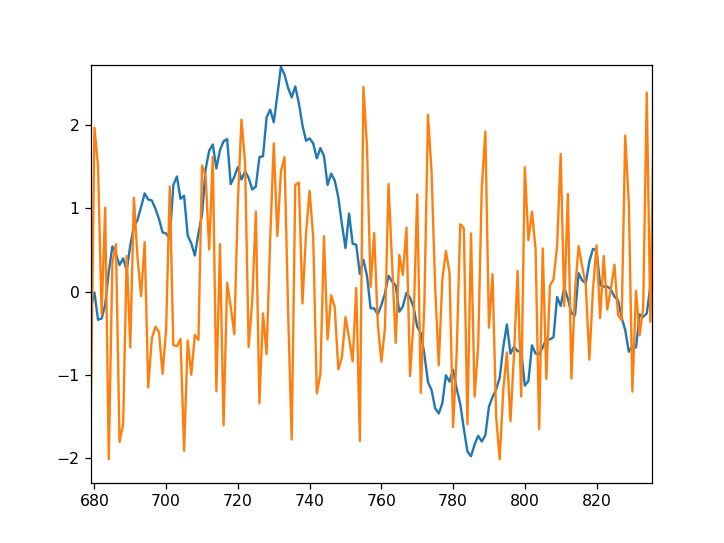

In [47]:
# Write an autoregressive model

def AR1(theta,scale,N,y0):

    y_t = np.zeros((N,))
    e_t = np.random.normal(scale=scale,size=(N,))

    y_t[0]=y0
    for ii in range(1,N):
        y_t[ii] = theta*y_t[ii-1] + e_t[ii]
    
    return y_t

def ARn(theta,scale,n,N,y0):

    y_t = np.zeros((N,))
    e_t = np.random.normal(scale=scale,size=(N,))

    y_t[0]=y0
    for ii in range(n,N):
        for nn in range(1,n+1):
            y_t[ii] += theta[n-1]*y_t[ii-n] 
        
        y_t[ii] += e_t[ii]
    
    return y_t


plt.figure()
#plt.plot(AR1(0.3,1,1000,0))
for ii in range(1):
    plt.plot(AR1(0.97,0.2,1000,0))
    plt.plot(np.random.normal(size=(1000,)))

# plt.plot(ARn([0.1,0.,0.3],1,3,1000,0))

# theta = np.zeros((10))
# theta[:]=0.1
# theta[9]=0.6
# plt.plot(ARn(theta,1,10,1000,0))